# FastSAM

In [1]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...


In [2]:
!pip -q install -r FastSAM/requirements.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
ipykernel 6.9.1 requires jupyter-client<8.0, but you have jupyter-client 8.2.0 which is incompatible.


In [6]:
# install CLIP
!pip -q install git+https://github.com/openai/CLIP.git

In [1]:
import supervision as sv
import numpy as np
import cv2
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [2]:
# import os
# import cv2
# import torch
from FastSAM.fastsam import FastSAM, FastSAMPrompt

In [3]:
fast_sam = FastSAM("FastSAM.pt")

In [4]:
image = cv2.imread('lion.jpg')  #Try houses.jpg or neurons.jpg
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [18]:
def annotate_image(image_path: str, masks: np.ndarray) -> np.ndarray:
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    xyxy = sv.mask_to_xyxy(masks=masks)
    detections = sv.Detections(xyxy=xyxy, mask=masks)

    mask_annotator = sv.MaskAnnotator()
    return mask_annotator.annotate(scene=image, detections=detections)

In [43]:
IMAGE_PATH = "Images/test2.jpg"
results = fast_sam(
    source=IMAGE_PATH,
    device="cpu",
    retina_masks=True,
    conf=0.3,
    iou=0.5)
prompt_process = FastSAMPrompt(IMAGE_PATH, results, device="cpu")
masks = prompt_process.everything_prompt()
# prompt_process.plot(annotations=masks, output_path="./output/one.jpg")


image 1/1 C:\Users\Ankush\Desktop\Trimester-4\Playground\Images\test2.jpg: 448x1024 35 objects, 2216.3ms
Speed: 5.3ms preprocess, 2216.3ms inference, 115.9ms postprocess per image at shape (1, 3, 1024, 1024)


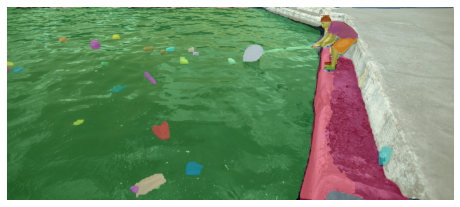

In [44]:
masks2 = masks.numpy().astype(bool)
annotated_image=annotate_image(image_path=IMAGE_PATH, masks=masks2)
sv.plot_image(image=annotated_image, size=(8, 8))

Ultralytics

In [12]:
from ultralytics import FastSAM
from ultralytics.yolo.fastsam import FastSAMPrompt

ImportError: cannot import name 'FastSAM' from 'ultralytics' (C:\Users\Ankush\anaconda3\lib\site-packages\ultralytics\__init__.py)

In [ ]:
# Define image path and inference device
IMAGE_PATH = 'ultralytics/assets/bus.jpg'
DEVICE = 'cpu'

# Create a FastSAM model
model = FastSAM('FastSAM-s.pt')  # or FastSAM-x.pt

# Run inference on an image
everything_results = model(IMAGE_PATH,
                           device=DEVICE,
                           retina_masks=True,
                           imgsz=1024,
                           conf=0.4,
                           iou=0.9)

prompt_process = FastSAMPrompt(IMAGE_PATH, everything_results, device=DEVICE)

# Everything prompt
ann = prompt_process.everything_prompt()